# Market segmentation by type of EV to sell

The data has been taken from Kaggle.com  
The dataset indicates the number of EV sales divided into categories of 2 wheeler, 3 wheeler, 4 wheeler and Bus.  
We start by reading the csv file into the portal using pandas. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Ev Sales 17-23.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YEAR    74 non-null     object 
 1   2 W     74 non-null     float64
 2   3 W     74 non-null     float64
 3   4 W     74 non-null     float64
 4   BUS     74 non-null     float64
 5   TOTAL   74 non-null     float64
dtypes: float64(5), object(1)
memory usage: 3.6+ KB


In [4]:
df.describe()

,2 W,3 W,4 W,BUS,TOTAL
count,74.000000,74.000000,74.000000,74.000000,74.000000
mean,16938.729730,14851.351351,1272.567568,82.310811,33144.959459
std,25846.636971,11002.517635,1841.195763,79.696672,38251.453387
min,85.000000,668.000000,3.000000,0.000000,958.000000
25%,1304.250000,7782.250000,187.750000,11.250000,9147.000000
50%,3014.500000,10619.500000,317.500000,74.500000,14526.000000
75%,23599.000000,18641.750000,1545.000000,113.500000,43902.750000
max,105154.000000,45225.000000,8852.000000,331.000000,157788.000000


# EDA and Data Pre-Processing

In [5]:
df.isnull().sum()

YEAR     1
2 W      1
3 W      1
4 W      1
BUS      1
TOTAL    1
dtype: int64

<AxesSubplot:>

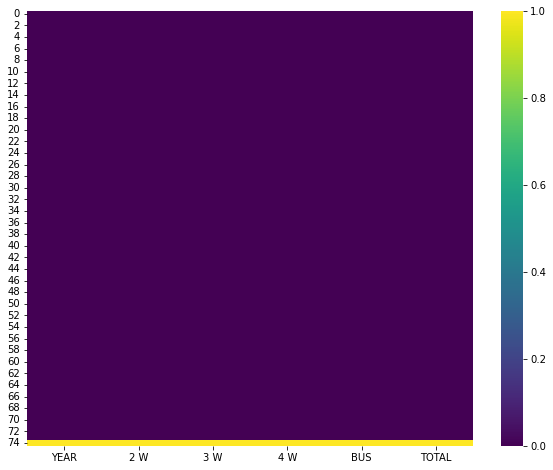

In [6]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull(),cmap='viridis')

In [7]:
df = df.drop(df.index[74])

In [8]:
df.isnull().sum()

YEAR     0
2 W      0
3 W      0
4 W      0
BUS      0
TOTAL    0
dtype: int64

In [9]:
df.head()

,YEAR,2 W,3 W,4 W,BUS,TOTAL
0,Apr-17,96.0,4748.0,198.0,0.0,5042.0
1,May-17,91.0,6720.0,215.0,2.0,7028.0
2,Jun-17,137.0,7178.0,149.0,1.0,7465.0
3,Jul-17,116.0,8775.0,120.0,0.0,9011.0
4,Aug-17,99.0,8905.0,137.0,0.0,9141.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YEAR    74 non-null     object 
 1   2 W     74 non-null     float64
 2   3 W     74 non-null     float64
 3   4 W     74 non-null     float64
 4   BUS     74 non-null     float64
 5   TOTAL   74 non-null     float64
dtypes: float64(5), object(1)
memory usage: 3.6+ KB


In [11]:
df

,YEAR,2 W,3 W,4 W,BUS,TOTAL
0,Apr-17,96.0,4748.0,198.0,0.0,5042.0
1,May-17,91.0,6720.0,215.0,2.0,7028.0
2,Jun-17,137.0,7178.0,149.0,1.0,7465.0
3,Jul-17,116.0,8775.0,120.0,0.0,9011.0
4,Aug-17,99.0,8905.0,137.0,0.0,9141.0
...,...,...,...,...,...,...
69,Jan-23,64649.0,34308.0,3490.0,98.0,102545.0
70,Feb-23,66033.0,35995.0,4850.0,99.0,106977.0
71,Mar-23,86194.0,45225.0,8852.0,89.0,140360.0
72,Apr-23,66755.0,38016.0,6193.0,84.0,111048.0


In [12]:
df = df.set_index('YEAR')

In [13]:
df.head()

,2 W,3 W,4 W,BUS,TOTAL
YEAR,,,,,
Apr-17,96.0,4748.0,198.0,0.0,5042.0
May-17,91.0,6720.0,215.0,2.0,7028.0
Jun-17,137.0,7178.0,149.0,1.0,7465.0
Jul-17,116.0,8775.0,120.0,0.0,9011.0
Aug-17,99.0,8905.0,137.0,0.0,9141.0


In [14]:
df = df.drop('TOTAL',axis=1)

<AxesSubplot:xlabel='YEAR'>

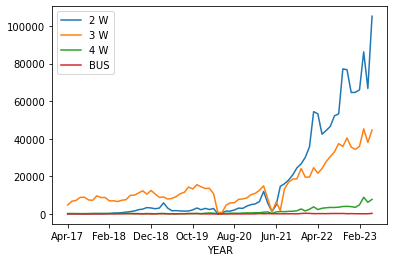

In [15]:
df[['2 W','3 W', '4 W', 'BUS']].plot()

# Segment Extraaction   

After visualizing the data, we move on to extracting suitable segments from the given database.  
We perform the segmentation using different ML techniques, and evaluate the results to finally get the best suited method for our project.
The techniques used in this project are:
1. K-Means CLustering
2. Heirarchical Clustering
3. PCA followed by clustering
4. Gaussian Mixture Models (GMMs)
5. DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

# K means clustering

In [16]:
from sklearn.cluster import KMeans  
from sklearn.preprocessing import MinMaxScaler

In [17]:
df_transposed = df.transpose()  

Cluster 0 members:
['2 W', '3 W']
Cluster 1 members:
['4 W', 'BUS']


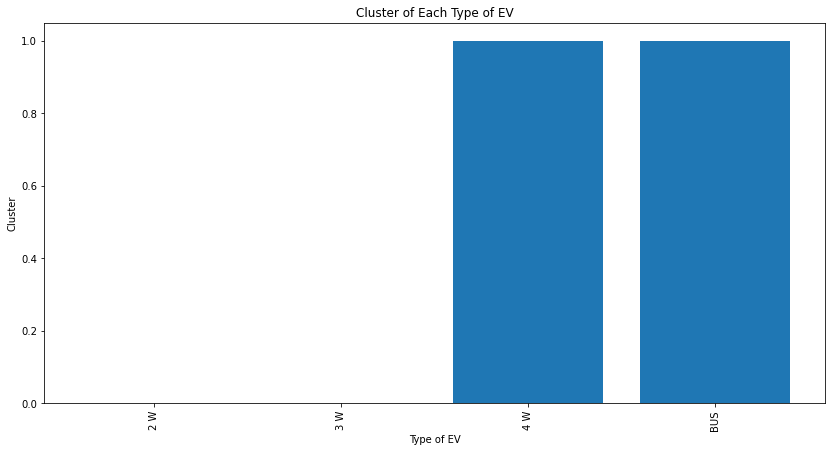

In [18]:
scaler = MinMaxScaler()  
df_transposed_scaled = scaler.fit_transform(df_transposed)  

k = 2  

kmeans = KMeans(n_clusters=k, random_state=42)  
clusters = kmeans.fit_predict(df_transposed_scaled)  
  
df_transposed['Cluster'] = clusters  
  
for i in range(k):  
    cluster_members = df_transposed[df_transposed['Cluster'] == i]  
    print(f"Cluster {i} members:")  
    print(cluster_members.index.tolist())  
  
plt.figure(figsize=(14, 7))  
plt.bar(df_transposed.index, df_transposed['Cluster'])  
plt.xlabel('Type of EV')  
plt.ylabel('Cluster')  
plt.title('Cluster of Each Type of EV')  
plt.xticks(rotation=90)  
plt.show()

To find the optimal number of clusters, we perform the elbow method

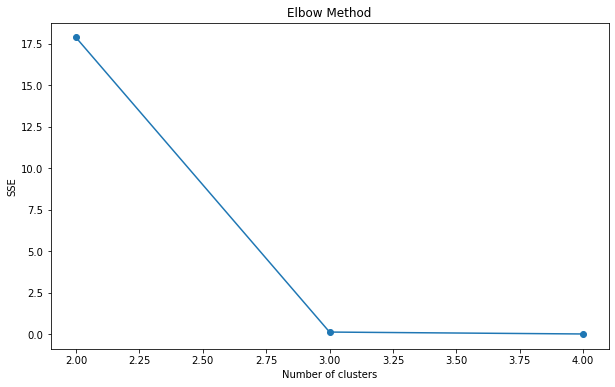

In [19]:
sse = []  
for k in range(2, 5):
    kmeans = KMeans(n_clusters=k, random_state=42)  
    kmeans.fit(df_transposed_scaled)  
    sse.append(kmeans.inertia_)  
  
plt.figure(figsize=(10, 6))  
plt.plot(range(2, 5), sse, marker='o')  
plt.title('Elbow Method')  
plt.xlabel('Number of clusters')  
plt.ylabel('SSE')  
plt.show()  

From the plot above, we can take the optimal number of clusters as 3, and recalculate the clusters

Cluster 0 members:
['4 W', 'BUS']
Cluster 1 members:
['3 W']
Cluster 2 members:
['2 W']


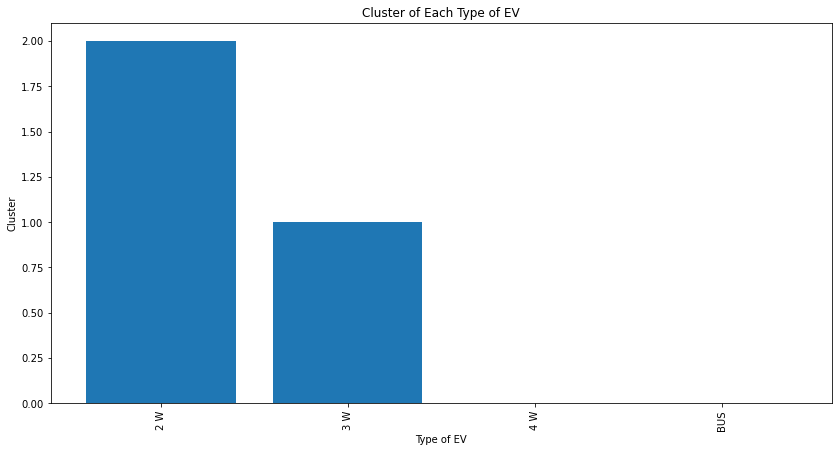

In [20]:
k = 3  
  
kmeans = KMeans(n_clusters=k, random_state=42)  
clusters = kmeans.fit_predict(df_transposed_scaled)  
  
df_transposed['Cluster'] = clusters  
  
for i in range(k):  
    cluster_members = df_transposed[df_transposed['Cluster'] == i]  
    print(f"Cluster {i} members:")  
    print(cluster_members.index.tolist())  
  
plt.figure(figsize=(14, 7))  
plt.bar(df_transposed.index, df_transposed['Cluster'])  
plt.xlabel('Type of EV')  
plt.ylabel('Cluster')  
plt.title('Cluster of Each Type of EV')  
plt.xticks(rotation=90)   
plt.show()

Each cluster contains types of EVs that have a similar sales pattern over the given time periods. Analyzing the characteristics of each cluster can help decide which type of EV to invest in based on:  
- Sales Consistency: Types of EVs that show consistent sales over time might indicate a stable market demand.  
- Growth Trends: EVs that belong to clusters with increasing sales trends could signal rising popularity and a potentially good investment.  
- Market Saturation: Clusters with many different types of EVs might suggest a saturated market, indicating higher competition.  
- Niche Markets: Clusters with few types of EVs or distinct sales patterns might represent niche markets with specific consumer needs.  

The choice of the number of clusters (k) is crucial, and using methods like the Elbow Method as shown can help select an appropriate k.

# Evaluation of K-Means Segmentation

In [21]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [22]:
silhouette_avg = silhouette_score(df_transposed_scaled, clusters)
print(f"Silhouette Score for K-Means Clustering: {silhouette_avg}")

Silhouette Score for K-Means Clustering: 0.4538202356503319


In [23]:
inertia = kmeans.inertia_
print(f"Inertia for K-Means Clustering: {inertia}")

Inertia for K-Means Clustering: 0.11537811304824808


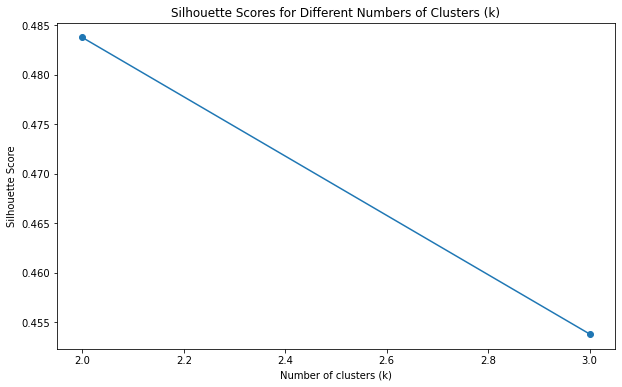

In [24]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 4):
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(df_transposed_scaled)
    silhouette_avg = silhouette_score(df_transposed_scaled, clusters)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 4), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters (k)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

# Hierarchical clustering 

In [25]:
from scipy.cluster.hierarchy import dendrogram, linkage  
from sklearn.preprocessing import StandardScaler  

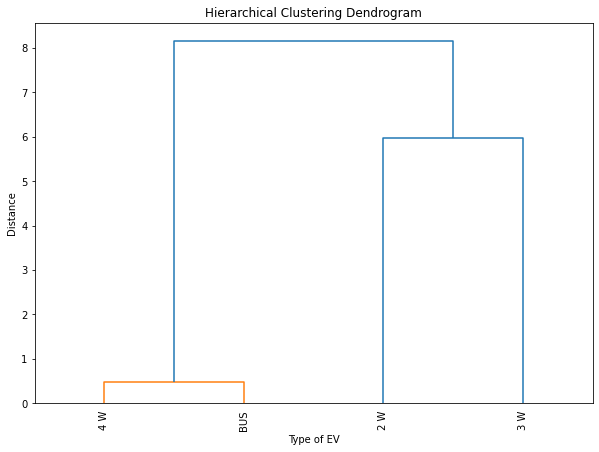

In [26]:
Z = linkage(df_transposed_scaled, method='ward')  
  
plt.figure(figsize=(10, 7))  
dendrogram(Z, labels=df_transposed.index, leaf_rotation=90, leaf_font_size=10)  
plt.title('Hierarchical Clustering Dendrogram')  
plt.xlabel('Type of EV')  
plt.ylabel('Distance')  
plt.show()  

The dendrogram provides a visual representation of the clusters formed at each level of the hierarchy and can help decide on a distance threshold (max_d) to define the number of clusters you want to use. You can also specify directly the number of clusters with the fcluster function.

# Evaluation of Hierarchical Clustering

In [27]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(Z, pdist(df_transposed_scaled))

print(f"Cophenetic Correlation Coefficient: {c}")

Cophenetic Correlation Coefficient: 0.8912911051088002


This code uses the cophenet() function from scipy.cluster.hierarchy to compute the cophenetic correlation coefficient for hierarchical clustering.

A higher cophenetic correlation coefficient closer to 1 indicates that the dendrogram represents the original distances well, suggesting a good hierarchical clustering. This metric provides an evaluation of the clustering structure obtained through hierarchical clustering.

# Principal Component Analysis (PCA) followed by Clustering

In [28]:
from sklearn.decomposition import PCA  

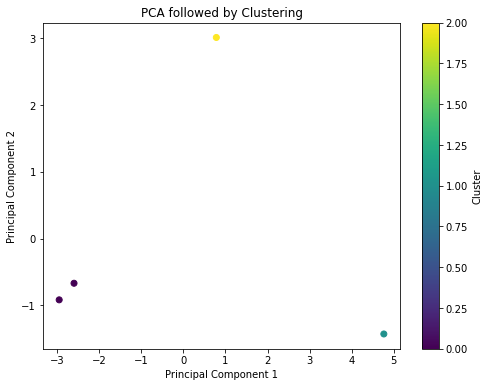

Cluster 0 members:
['4 W', 'BUS']
Cluster 1 members:
['3 W']
Cluster 2 members:
['2 W']
     Principal Component 1  Principal Component 2  Cluster
2 W               0.783617               3.012740        2
3 W               4.761746              -1.427839        1
4 W              -2.596460              -0.668322        0
BUS              -2.948904              -0.916579        0


In [29]:
pca = PCA(n_components=2)   
principal_components = pca.fit_transform(df_transposed_scaled)  
  
pca_df = pd.DataFrame(data = principal_components, columns = ['Principal Component 1', 'Principal Component 2'])  
pca_df.index = df_transposed.index  
  
kmeans = KMeans(n_clusters=3, random_state=42)
pca_df['Cluster'] = kmeans.fit_predict(pca_df[['Principal Component 1', 'Principal Component 2']])  
  
plt.figure(figsize=(8, 6))  
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], c=pca_df['Cluster'], cmap='viridis')  
plt.title('PCA followed by Clustering')  
plt.xlabel('Principal Component 1')  
plt.ylabel('Principal Component 2')  
plt.colorbar(label='Cluster')  
plt.show()  
  
for cluster_number in sorted(pca_df['Cluster'].unique()):  
    cluster_members = pca_df.index[pca_df['Cluster'] == cluster_number].tolist()  
    print(f"Cluster {cluster_number} members:")  
    print(cluster_members)  

print(pca_df)  


Each point in the scatter plot represents a type of EV, and the color indicates the cluster assignment. This visualization can help to understand the different segments of EV types based on the reduced dimensions.

Finally, this prints out the members of each cluster, which are the types of EVs that fall into each segment. We can then examine these clusters to help inform your decision on which EV type to invest in.

# Evaluation

In [30]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(pca_df[['Principal Component 1', 'Principal Component 2']], pca_df['Cluster'])
print(f"Silhouette Score for PCA followed by K-Means Clustering: {silhouette_avg}")

Silhouette Score for PCA followed by K-Means Clustering: 0.45854773199309773


The silhouette score measures the quality of clustering, indicating how well-separated the clusters are. A higher silhouette score closer to 1 implies better-defined clusters.

# Gaussian Mixture Models (GMMs)

In [31]:
from sklearn.mixture import GaussianMixture     

In [32]:
n_components = 3  

gmm = GaussianMixture(n_components=n_components, random_state=42)  
gmm_clusters = gmm.fit_predict(df_transposed_scaled)  
  
df_transposed['Cluster'] = gmm_clusters  
  
print(df_transposed)  

YEAR  Apr-17  May-17  Jun-17  Jul-17  Aug-17  Sep-17  Oct-17  Nov-17  Dec-17  \
2 W     96.0    91.0   137.0   116.0    99.0   109.0   160.0   214.0   189.0   
3 W   4748.0  6720.0  7178.0  8775.0  8905.0  7414.0  7250.0  9598.0  8719.0   
4 W    198.0   215.0   149.0   120.0   137.0   193.0   214.0   186.0   179.0   
BUS      0.0     2.0     1.0     0.0     0.0     0.0     0.0    11.0     0.0   

YEAR  Jan-18  ...   Sep-22   Oct-22   Nov-22   Dec-22   Jan-23   Feb-23  \
2 W    176.0  ...  53210.0  77137.0  76700.0  64598.0  64649.0  66033.0   
3 W   8750.0  ...  37404.0  35889.0  40403.0  35542.0  34308.0  35995.0   
4 W    210.0  ...   3589.0   3950.0   4027.0   3879.0   3490.0   4850.0   
BUS     29.0  ...    204.0    243.0    118.0    151.0     98.0     99.0   

YEAR   Mar-23   Apr-23    May-23  Cluster  
2 W   86194.0  66755.0  105154.0        2  
3 W   45225.0  38016.0   44615.0        1  
4 W    8852.0   6193.0    7736.0        0  
BUS      89.0     84.0     283.0        0  

[4

Model selection using BIC and AIC to find the best number of components  

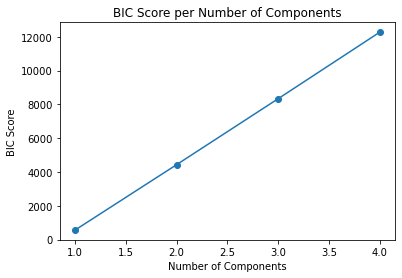

In [33]:
bic_scores = []  
n_components_range = range(1, 5)
for n_components in n_components_range:  
    gmm = GaussianMixture(n_components=n_components, random_state=42)  
    gmm.fit(df_transposed_scaled)  
    bic_scores.append(gmm.bic(df_transposed_scaled))  

plt.plot(n_components_range, bic_scores, marker='o')  
plt.title('BIC Score per Number of Components')  
plt.xlabel('Number of Components')  
plt.ylabel('BIC Score')  
plt.show()  


In [1]:
aic_scores = []  
n_components_range = range(1, 5)   
for n_components in n_components_range:  
    gmm = GaussianMixture(n_components=n_components, random_state=42)  
    gmm.fit(df_transposed_scaled)  
    aic_scores.append(gmm.aic(df_transposed_scaled))  
  
plt.plot(n_components_range, aic_scores, marker='o')  
plt.title('AIC Score per Number of Components')  
plt.xlabel('Number of Components')  
plt.ylabel('AIC Score')  
plt.show()  

NameError: name 'GaussianMixture' is not defined

This code calculates and plots BIC and AIC values for different numbers of components (clusters) in GMM.

The optimal number of components can be chosen based on the point where BIC or AIC reaches a minimum value. Lower BIC or AIC values indicate a better model fit, representing the most suitable number of clusters for the GMM.

# DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

In [35]:
from sklearn.cluster import DBSCAN  

In [36]:
dbscan = DBSCAN(eps=20, min_samples=20)
dbscan_clusters = dbscan.fit_predict(df_transposed_scaled)  
  
df_transposed['Cluster'] = dbscan_clusters  
  
print(df_transposed)  

YEAR  Apr-17  May-17  Jun-17  Jul-17  Aug-17  Sep-17  Oct-17  Nov-17  Dec-17  \
2 W     96.0    91.0   137.0   116.0    99.0   109.0   160.0   214.0   189.0   
3 W   4748.0  6720.0  7178.0  8775.0  8905.0  7414.0  7250.0  9598.0  8719.0   
4 W    198.0   215.0   149.0   120.0   137.0   193.0   214.0   186.0   179.0   
BUS      0.0     2.0     1.0     0.0     0.0     0.0     0.0    11.0     0.0   

YEAR  Jan-18  ...   Sep-22   Oct-22   Nov-22   Dec-22   Jan-23   Feb-23  \
2 W    176.0  ...  53210.0  77137.0  76700.0  64598.0  64649.0  66033.0   
3 W   8750.0  ...  37404.0  35889.0  40403.0  35542.0  34308.0  35995.0   
4 W    210.0  ...   3589.0   3950.0   4027.0   3879.0   3490.0   4850.0   
BUS     29.0  ...    204.0    243.0    118.0    151.0     98.0     99.0   

YEAR   Mar-23   Apr-23    May-23  Cluster  
2 W   86194.0  66755.0  105154.0       -1  
3 W   45225.0  38016.0   44615.0       -1  
4 W    8852.0   6193.0    7736.0       -1  
BUS      89.0     84.0     283.0       -1  

[4

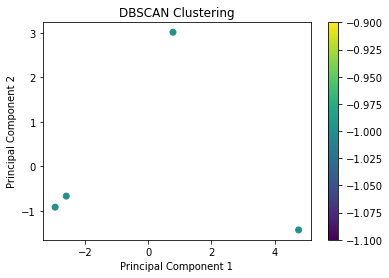

In [37]:
from sklearn.decomposition import PCA  
pca = PCA(n_components=2)  
pca_result = pca.fit_transform(df_transposed_scaled)  
plt.scatter(pca_result[:,0], pca_result[:,1], c=dbscan_clusters, cmap='viridis', label='Cluster Label')  
plt.colorbar()  
plt.title('DBSCAN Clustering')  
plt.xlabel('Principal Component 1')  
plt.ylabel('Principal Component 2')  
plt.show()  

eps is the maximum distance between two samples for them to be considered as in the same neighborhood  
min_samples is the number of samples in a neighborhood for a point to be considered as a core point  

In this code, we first scale the data using StandardScaler to ensure that all features contribute equally to the distance calculations. Then, we fit the DBSCAN algorithm to the scaled data. The parameters eps and min_samples have significant effects on the resulting clusters and may need to be fine-tuned based on the specific data.

DBSCAN assigns a label of -1 to noise points that do not fit well into any cluster. After running the algorithm, the Cluster column is added to the DataFrame, indicating the cluster each type of EV belongs to, with -1 indicating outlier EV types.

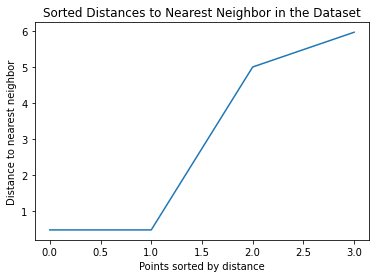

In [38]:
from sklearn.neighbors import NearestNeighbors  
  
nearest_neighbors = NearestNeighbors(n_neighbors=2)  # We use 2 because the point itself is included  
nearest_neighbors.fit(df_transposed_scaled)  
distances, indices = nearest_neighbors.kneighbors(df_transposed_scaled)  
  
distances = np.sort(distances, axis=0)  
distances = distances[:, 1]  # Grab the distances to the nearest actual neighbor  
  
plt.plot(distances)  
plt.title("Sorted Distances to Nearest Neighbor in the Dataset")  
plt.xlabel("Points sorted by distance")  
plt.ylabel("Distance to nearest neighbor")  
plt.show()  

In the plot generated by the code above, we're looking for the point of maximum curvature (often referred to as the "elbow"), which should give you a good starting value for eps. The y-axis has the distances, and the "elbow" is where the distance starts to increase more rapidly.

For min_samples, a common choice is to start with the number of dimensions in the dataset plus one. The min_samples parameter primarily controls how tolerant the algorithm is towards noise (with higher values leading to fewer clusters), so it can also be set based on your domain knowledge of what constitutes a dense region in your data.

After finding a reasonable eps, you can further fine-tune both eps and min_samples using silhouette scores, Calinski-Harabasz Index, or Davies-Bouldin Index to compare the clustering results. Here's an example of how to adjust the parameters iteratively:

In [39]:
from sklearn.metrics import silhouette_score  
  
eps = 0.3  
min_samples = df_transposed_scaled.shape[1] + 1  
  
for eps in np.arange(0.1, 3.0, 0.1):  
    for min_samples in range(2, 10):  
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)  
        labels = dbscan.fit_predict(df_transposed_scaled)  
          
        if len(set(labels)) > 1 and np.sum(labels != -1) > 0:  
            silhouette = silhouette_score(df_transposed_scaled, labels)  
            print(f"DBSCAN eps={eps}, min_samples={min_samples}, clusters={len(set(labels))-1}, silhouette={silhouette}")  

DBSCAN eps=0.5, min_samples=2, clusters=1, silhouette=0.4837434150921928
DBSCAN eps=0.6, min_samples=2, clusters=1, silhouette=0.4837434150921928
DBSCAN eps=0.7000000000000001, min_samples=2, clusters=1, silhouette=0.4837434150921928
DBSCAN eps=0.8, min_samples=2, clusters=1, silhouette=0.4837434150921928
DBSCAN eps=0.9, min_samples=2, clusters=1, silhouette=0.4837434150921928
DBSCAN eps=1.0, min_samples=2, clusters=1, silhouette=0.4837434150921928
DBSCAN eps=1.1, min_samples=2, clusters=1, silhouette=0.4837434150921928
DBSCAN eps=1.2000000000000002, min_samples=2, clusters=1, silhouette=0.4837434150921928
DBSCAN eps=1.3000000000000003, min_samples=2, clusters=1, silhouette=0.4837434150921928
DBSCAN eps=1.4000000000000001, min_samples=2, clusters=1, silhouette=0.4837434150921928
DBSCAN eps=1.5000000000000002, min_samples=2, clusters=1, silhouette=0.4837434150921928
DBSCAN eps=1.6, min_samples=2, clusters=1, silhouette=0.4837434150921928
DBSCAN eps=1.7000000000000002, min_samples=2, clu

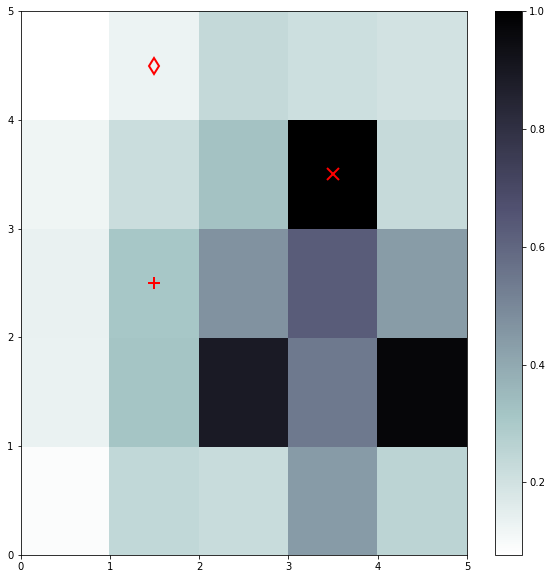

In [40]:
from minisom import MiniSom  
from sklearn.preprocessing import StandardScaler   
  
  
scaler = StandardScaler()  
df_transposed_scaled = scaler.fit_transform(df_transposed)  
  
# Initialize the SOM  
x = 5  # number of neurons (width of the grid)  
y = 5  # number of neurons (height of the grid)  
som = MiniSom(x, y, df_transposed_scaled.shape[1], sigma=0.5, learning_rate=0.5)  
  
# Train the SOM with the normalized data  
som.train_random(df_transposed_scaled, 100)  # 100 iterations  
  
# Assign each sample to its closest neuron  
winner_coordinates = np.array([som.winner(x) for x in df_transposed_scaled]).T  
# Transform the two-dimensional grid coordinates to a one-dimensional array index  
cluster_index = np.ravel_multi_index(winner_coordinates, (x,y))  
  
# Add the cluster assignments to the original DataFrame  
df_transposed['Cluster'] = cluster_index  
  
# Visualizing the results is a bit more complex. You can use the distance map as a representation of the SOM  
# Plotting the U-Matrix  
plt.figure(figsize=(10, 10))  
u_matrix = som.distance_map()  
plt.pcolor(u_matrix, cmap='bone_r')  # plotting the distance map as background  
plt.colorbar()  
  
# Use different markers for each cluster  
markers = ['o', 's', 'D', 'v', '^', 'p', '*', '+', 'x', 'd']  
for cnt, xx in enumerate(df_transposed_scaled):  
    w = som.winner(xx)  # getting the winner  
    # place a marker on the winning position for the sample xx  
    plt.plot(w[0]+.5, w[1]+.5, markers[df_transposed['Cluster'][cnt] % len(markers)], markerfacecolor='None',  
             markeredgecolor='r', markersize=12, markeredgewidth=2)  
plt.axis([0, som.get_weights().shape[0], 0, som.get_weights().shape[1]])  
plt.show()  


The plot in the code represents a U-Matrix (Unified Distance Matrix) visualization of the Self-Organizing Map (SOM). In a U-Matrix:  
   
- Each cell in the grid represents a neuron (or node) in the SOM.  
- The color of the cell indicates the distance between a neuron and its neighboring neurons. Darker colors represent larger distances, and lighter colors represent smaller distances.  
- The distance between neurons is a proxy for dissimilarity; neurons that are closer together in the input space will have similar weights and be closer on the map, resulting in a lighter color on the U-Matrix.  
- The markers on the plot (if plotted) represent the individual data points (types of EVs), positioned at the location of their Best Matching Unit (BMU), which is the neuron with the most similar weights to the data point.  
   
Conclusions from the U-Matrix plot:  
- Clusters: Groups of neurons with similar weights (light-colored areas) can be interpreted as clusters of similar data points. In the context of your dataset, this would mean types of EVs with similar sales patterns over the months.  
- Boundaries: Darker areas indicate potential boundaries between different clusters, suggesting dissimilarity between the types of EVs in these different areas of the input space.  
- Outliers: Isolated neurons with high dissimilarity (darker cells surrounded by lighter areas) may indicate outliers or unique data points.  
   
By examining the U-Matrix, you can draw conclusions about the natural groupings in your dataset, which in your case represent the types of EVs with similar sales patterns. If markers were plotted, you could further identify which specific EV types belong to which clusters and how dense these clusters are.  
   
The key to using SOMs effectively for market segmentation is interpreting the U-Matrix in the context of your data and using the clusters to inform your business strategy. For instance, EV types that fall into a densely populated cluster (a large light-colored area) might represent a popular market segment, while outliers might represent niche markets that could be targeted or avoided, depending on your strategy.

best = 3 segments

# Profiling of Segments

In [41]:
df_transposed

YEAR,Apr-17,May-17,Jun-17,Jul-17,Aug-17,Sep-17,Oct-17,Nov-17,Dec-17,Jan-18,...,Sep-22,Oct-22,Nov-22,Dec-22,Jan-23,Feb-23,Mar-23,Apr-23,May-23,Cluster
2 W,96.0,91.0,137.0,116.0,99.0,109.0,160.0,214.0,189.0,176.0,...,53210.0,77137.0,76700.0,64598.0,64649.0,66033.0,86194.0,66755.0,105154.0,18
3 W,4748.0,6720.0,7178.0,8775.0,8905.0,7414.0,7250.0,9598.0,8719.0,8750.0,...,37404.0,35889.0,40403.0,35542.0,34308.0,35995.0,45225.0,38016.0,44615.0,9
4 W,198.0,215.0,149.0,120.0,137.0,193.0,214.0,186.0,179.0,210.0,...,3589.0,3950.0,4027.0,3879.0,3490.0,4850.0,8852.0,6193.0,7736.0,7
BUS,0.0,2.0,1.0,0.0,0.0,0.0,0.0,11.0,0.0,29.0,...,204.0,243.0,118.0,151.0,98.0,99.0,89.0,84.0,283.0,7


In [42]:
scaler = MinMaxScaler()  
df_transposed_scaled = scaler.fit_transform(df_transposed)  
k = 3    
kmeans = KMeans(n_clusters=k, random_state=42)  
clusters = kmeans.fit_predict(df_transposed_scaled)  
df_transposed['Cluster'] = clusters  
for i in range(k):  
    cluster_members = df_transposed[df_transposed['Cluster'] == i]  
    print(f"Cluster {i} members:")  
    print(cluster_members.index.tolist())

Cluster 0 members:
['4 W', 'BUS']
Cluster 1 members:
['3 W']
Cluster 2 members:
['2 W']


In [43]:
df_transposed['Cluster']

2 W    2
3 W    1
4 W    0
BUS    0
Name: Cluster, dtype: int32

In [44]:
def convert_to_year(column_name):
    year_str = column_name.split('-')[-1]
    return 2000 + int(year_str)

new_column_names = {col: convert_to_year(col) for col in df_transposed.drop('Cluster', axis=1).columns}
df2 = df_transposed.drop('Cluster', axis=1).rename(columns=new_column_names)

df2

YEAR,2017,2017,2017,2017,2017,2017,2017,2017,2017,2018,...,2022,2022,2022,2022,2022,2023,2023,2023,2023,2023
2 W,96.0,91.0,137.0,116.0,99.0,109.0,160.0,214.0,189.0,176.0,...,52196.0,53210.0,77137.0,76700.0,64598.0,64649.0,66033.0,86194.0,66755.0,105154.0
3 W,4748.0,6720.0,7178.0,8775.0,8905.0,7414.0,7250.0,9598.0,8719.0,8750.0,...,33055.0,37404.0,35889.0,40403.0,35542.0,34308.0,35995.0,45225.0,38016.0,44615.0
4 W,198.0,215.0,149.0,120.0,137.0,193.0,214.0,186.0,179.0,210.0,...,3417.0,3589.0,3950.0,4027.0,3879.0,3490.0,4850.0,8852.0,6193.0,7736.0
BUS,0.0,2.0,1.0,0.0,0.0,0.0,0.0,11.0,0.0,29.0,...,228.0,204.0,243.0,118.0,151.0,98.0,99.0,89.0,84.0,283.0


In [45]:
df2 = df2.transpose().groupby('YEAR').sum()

In [46]:
df2 = df2.transpose()

In [47]:
df2['Cluster'] = ['2','1','0','0']

In [48]:
df2

YEAR,2017,2018,2019,2020,2021,2022,2023,Cluster
2 W,1211.0,17062.0,30389.0,29112.0,156182.0,630725.0,388785.0,2
3 W,69307.0,110375.0,133489.0,90361.0,147180.0,350129.0,198159.0,1
4 W,1591.0,2500.0,1749.0,4323.0,14142.0,38744.0,31121.0,0
BUS,14.0,680.0,1093.0,88.0,1180.0,2383.0,653.0,0


Descriptive statistics: Mean, median, mode, standard deviation, and min max statistical measures for each feature within each cluster.

In [49]:
cluster_stats = df2.groupby('Cluster').agg(['mean', 'median', 'std', 'min', 'max'])
cluster_stats

YEAR        2017                                              2018            \
            mean   median          std      min      max      mean    median   
Cluster                                                                        
0          802.5    802.5  1115.107394     14.0   1591.0    1590.0    1590.0   
1        69307.0  69307.0          NaN  69307.0  69307.0  110375.0  110375.0   
2         1211.0   1211.0          NaN   1211.0   1211.0   17062.0   17062.0   

YEAR                                      ...      2022            \
                 std       min       max  ...      mean    median   
Cluster                                   ...                       
0        1286.934342     680.0    2500.0  ...   20563.5   20563.5   
1                NaN  110375.0  110375.0  ...  350129.0  350129.0   
2                NaN   17062.0   17062.0  ...  630725.0  630725.0   

YEAR                                           2023                          \
                  std       min       max      mean    median           std   
Cluster                                                                       
0        25711.109671    2383.0   38744.0   15887.0   15887.0  21544.129409   
1                 NaN  350129.0  350129.0  198159.0  198159.0           NaN   
2                 NaN  630725.0  630725.0  388785.0  388785.0           NaN   

YEAR                         
              min       max  
Cluster                      
0           653.0   31121.0  
1        198159.0  198159.0  
2        388785.0  388785.0  

[3 rows x 35 columns]

In [50]:
df2.columns[:-1]

Index([2017, 2018, 2019, 2020, 2021, 2022, 2023], dtype='object', name='YEAR')

Visualization: Visualized feature distributions for each cluster using box plot.

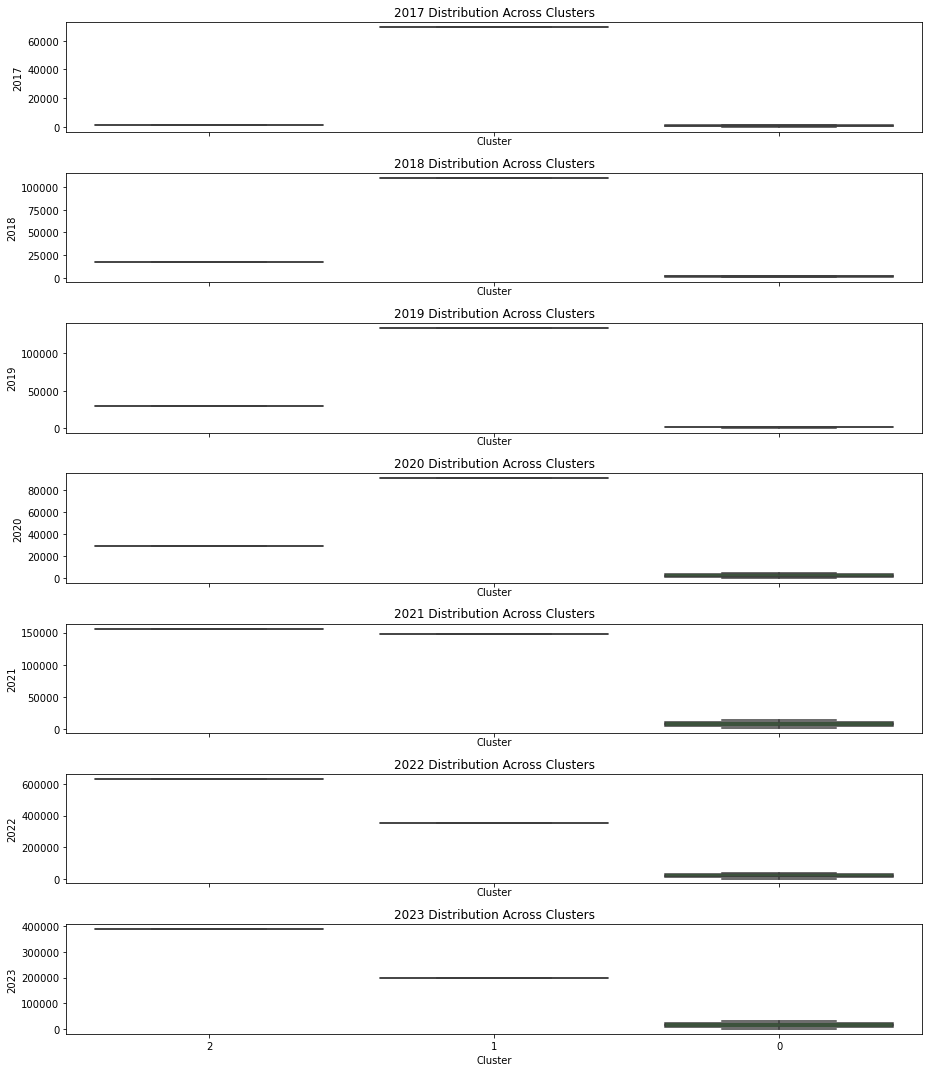

In [51]:
selected_features = df2.columns[:-1]

fig, axes = plt.subplots(len(selected_features), 1, figsize=(13, 30), sharex=True)

for idx, feature in enumerate(selected_features):
    sns.boxplot(x='Cluster', y=feature, data=df2, ax=axes[idx])
    axes[idx].set_title(f'{feature} Distribution Across Clusters')
    axes[idx].set_xlabel('Cluster')
    axes[idx].set_ylabel(feature)

plt.tight_layout()
plt.show()

Visualization: Visualized feature centroids for each cluster using scatter plot.

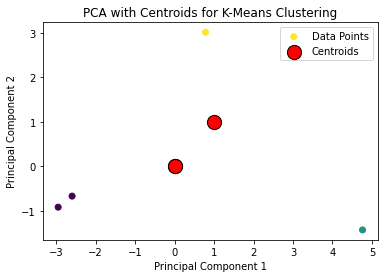

In [52]:
centroids_pca = kmeans.cluster_centers_

plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], c=kmeans.labels_, cmap='viridis', label='Data Points')

plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='o', s=200, c='red', edgecolor='black', label='Centroids')

plt.title('PCA with Centroids for K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

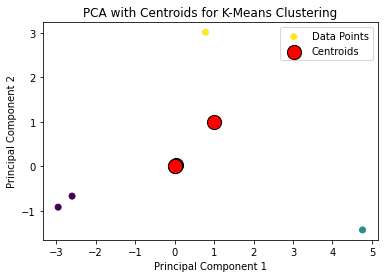

In [53]:
centroids_gmm = gmm.means_

plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], c=kmeans.labels_, cmap='viridis', label='Data Points')

plt.scatter(centroids_gmm[:, 0], centroids_gmm[:, 1], marker='o', s=200, c='red', edgecolor='black', label='Centroids')

plt.title('PCA with Centroids for K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


Feature Importance and Contribution: Identify which features contribute most to cluster separation or explain the differences between clusters.

To determine feature importance or contribution to clusters after performing clustering and obtaining cluster labels, we can analyze how features contribute to cluster separation. One common method is to examine the average values of features within each cluster compared to the overall dataset average.

In [54]:
cluster_means = df_transposed.groupby('Cluster').mean()
overall_mean = df_transposed.drop('Cluster', axis=1).mean()
feature_contributions = cluster_means.sub(overall_mean, axis=1)
feature_contributions_abs = feature_contributions.abs()
sorted_features = feature_contributions_abs.apply(lambda x: x.sort_values(ascending=False).index)

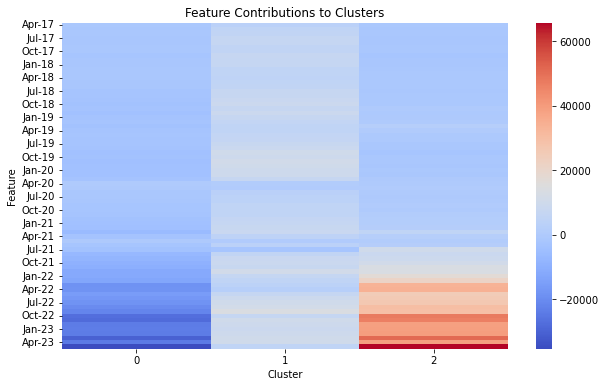

In [55]:
plt.figure(figsize=(10, 6))
sns.heatmap(feature_contributions.T, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Feature Contributions to Clusters')
plt.xlabel('Cluster')
plt.ylabel('Feature')
plt.show()

# Selecting Target Segment

In [56]:
df2

YEAR,2017,2018,2019,2020,2021,2022,2023,Cluster
2 W,1211.0,17062.0,30389.0,29112.0,156182.0,630725.0,388785.0,2
3 W,69307.0,110375.0,133489.0,90361.0,147180.0,350129.0,198159.0,1
4 W,1591.0,2500.0,1749.0,4323.0,14142.0,38744.0,31121.0,0
BUS,14.0,680.0,1093.0,88.0,1180.0,2383.0,653.0,0


1. Business Objectives:   
For the given EV startup, the objective is to cater to India's growing demand for sustainable transportation. Thus, our EV startup aims to introduce innovative electric vehicles that align with the government's clean energy initiatives and offer cost-effective mobility solutions.
2. Segment Evaluation:  
After analyzing India's EV market landscape, key segments identified include urban commuters, last-mile delivery services, and public transportation categorized into 2, 3, and 4 wheelers along with buses. Each segment showcases distinct growth potential and varying infrastructure readiness.
3. Alignment with Business Goals:  
Targeting the urban commuter segment aligns with our objective of providing affordable and eco-friendly transportation solutions to city dwellers, leveraging existing urban charging infrastructure. This mainly includes 2, 3, and 4 wheeler options.
4. Quantitative Assessment:  
Analysis indicates a significant surge in the adoption of electric two-wheelers among urban commuters, representing a substantial market share and promising growth trajectory within the Indian EV market.
5. Selection Criteria:  
Selecting the urban commuter, and more particularly the **2 wheeler** segment as our target aligns with emission reduction goals, considering the segment's contribution to reducing carbon emissions in densely populated urban areas. A highly exponential growth in the population of consumers going for the 2 wheeler options make this a conformed choice. 

As the analysis showed, the next probable step for the starup would be to step into the **3 wheeler** segment as it showed the next best possiblity of a high growing market.

# Customizing the Market Mix

1. Product Customization:  
Tailoring electric vehicle offerings for the urban commuter segment involves focusing on compact electric two-wheelers equipped with extended battery life, smart connectivity features, and lightweight design for city maneuverability.
2. Pricing Strategy Adaptation:  
Implementing a competitive pricing strategy for our electric two-wheelers aims to make them affordable for the urban commuter segment, offering cost-effective mobility solutions compared to traditional fuel-powered vehicles.
3. Place or Distribution Channel Tailoring:  
Leveraging existing urban distribution networks and establishing partnerships with local dealerships or ride-sharing platforms ensures convenient access to our electric vehicles for urban consumers.
4. Promotional Efforts Alignment:  
Crafting targeted social media campaigns and collaborating with urban lifestyle influencers will effectively communicate the benefits of our electric two-wheelers to the urban commuter segment.